In [1]:
import analyzer.plotting
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np
import matplotlib.pyplot as plt
from analyzer.plotting import PlotObject, drawAs1DHist, drawAs2DHist
from hist import Hist

In [2]:
SIGNAL_NAMES = ['signal_312_1000_400',
                'signal_312_1000_600',
                'signal_312_1000_700',
                'signal_312_1000_800',
                'signal_312_1000_900',
                'signal_312_1200_400',
                'signal_312_1200_600',
                'signal_312_1200_700',
                'signal_312_1200_800',
                'signal_312_1200_900',
                'signal_312_1200_1000',
                'signal_312_1200_1100',
                'signal_312_1300_400',
                'signal_312_1300_600',
                'signal_312_1300_1200',
                'signal_312_1400_400',
                'signal_312_1400_600',
                'signal_312_1400_1300',
                'signal_312_1500_400',
                'signal_312_1500_600',
                'signal_312_1500_900',
                'signal_312_1500_1000',
                'signal_312_1500_1100',
                'signal_312_1500_1200',
                'signal_312_1500_1300',
                'signal_312_1500_1350',
                'signal_312_1500_1400',
                'signal_312_1500_1450',
                'signal_312_2000_400',
                'signal_312_2000_600',
                'signal_312_2000_900',
                'signal_312_2000_1200',
                'signal_312_2000_1300',
                'signal_312_2000_1400',
                'signal_312_2000_1500',
                'signal_312_2000_1600',
                'signal_312_2000_1700',
                'signal_312_2000_1900']

In [3]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

a = AnalysisResult.fromFile("output_signal.pkl")
a_background = AnalysisResult.fromFile("output_background.pkl")
bg_hists = a_background.getMergedHistograms(s)

In [4]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
window_width = 300

m13_m_points = []
m24_m_points = []
m3_top_3_no_lead_b_points = []
m14_m_points = []

In [5]:
hists = a.results["signal_312_1000_400"].getScaledHistograms(s, None)
signal_hist = hists["m14_vs_m13"]
background_hist = bg_hists["m14_vs_m13"]

/srv/peakquality.py:40: RuntimeWarning: invalid value encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


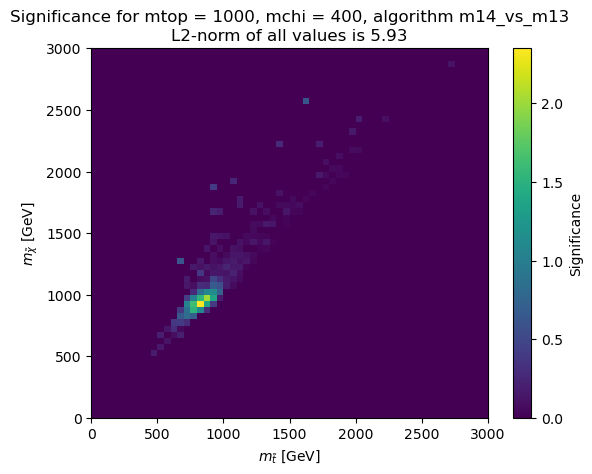

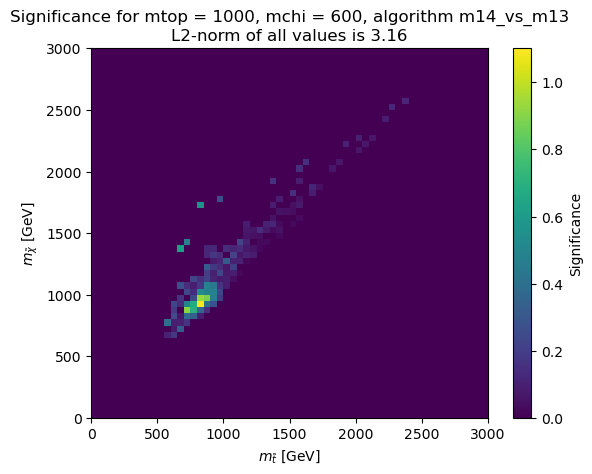

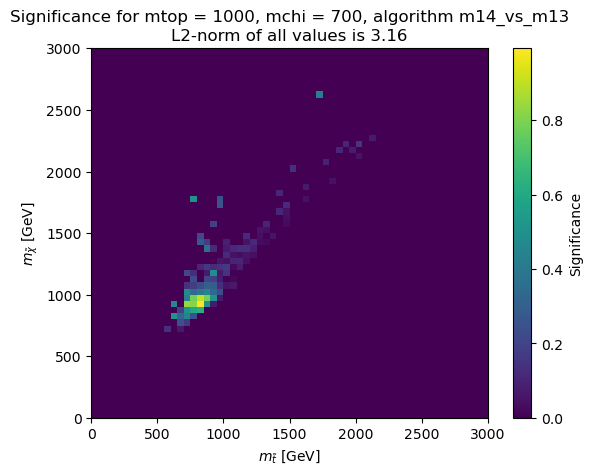

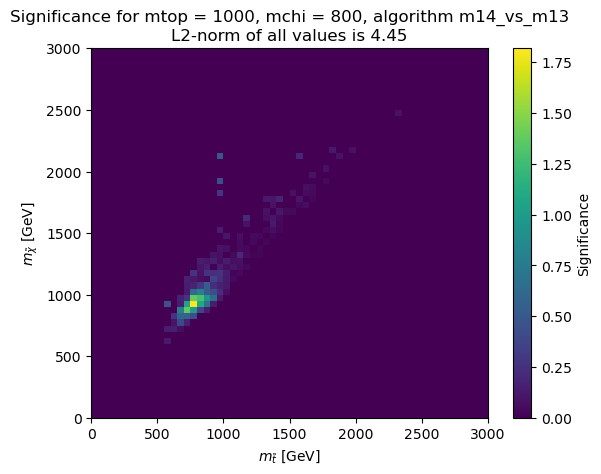

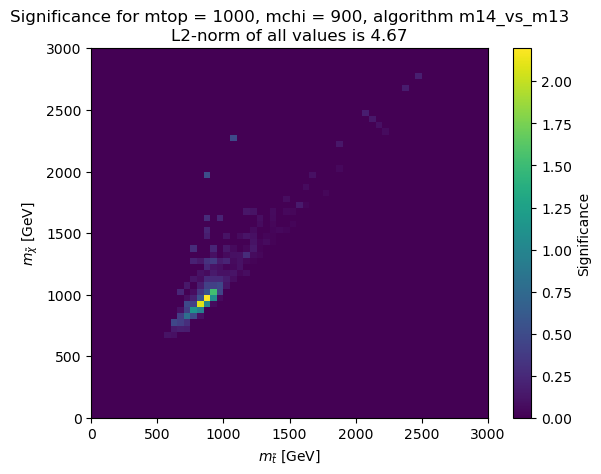

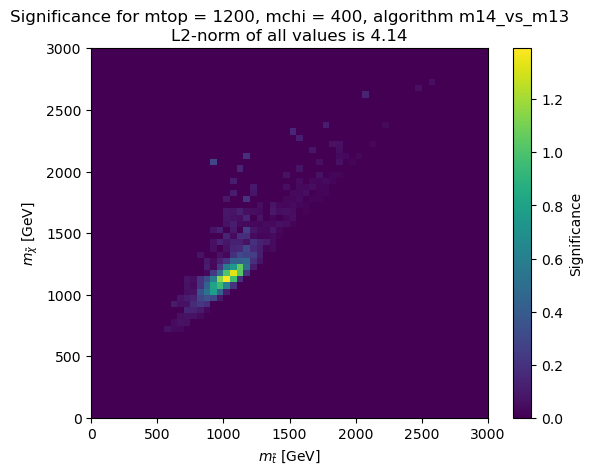

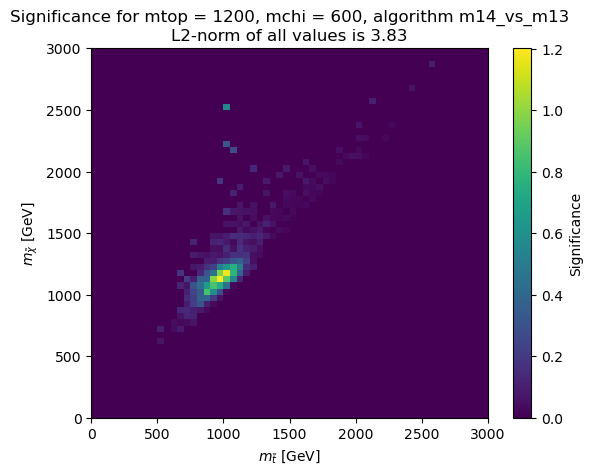

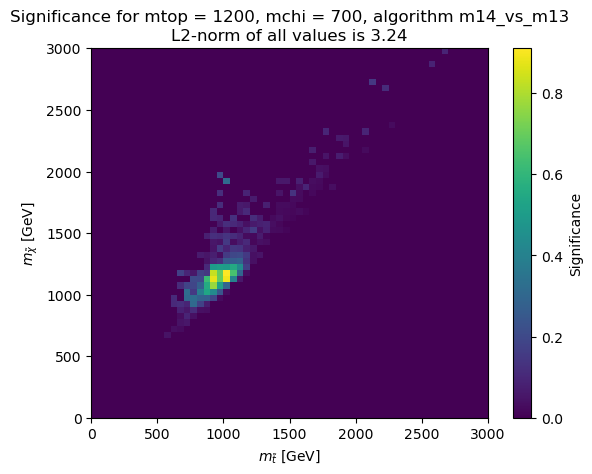

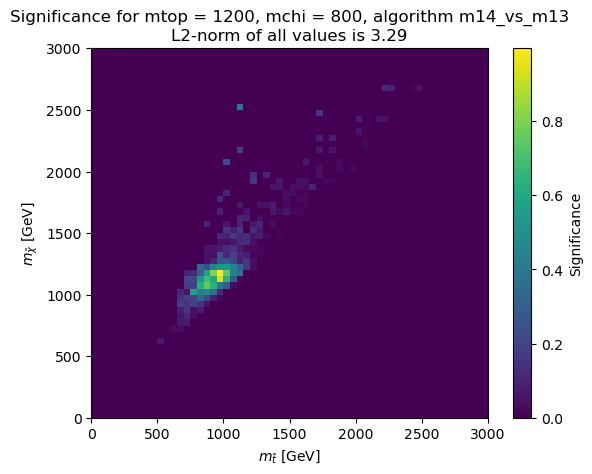

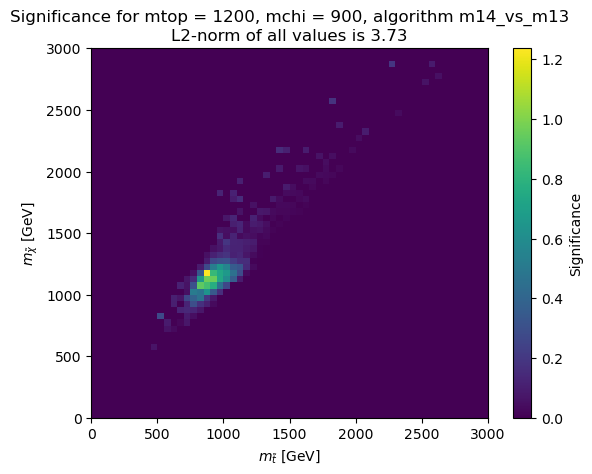

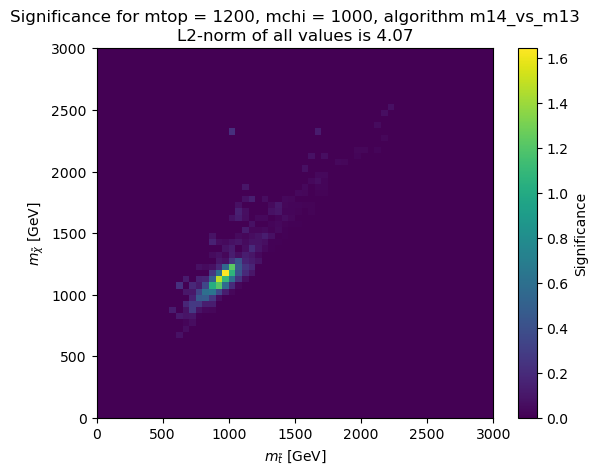

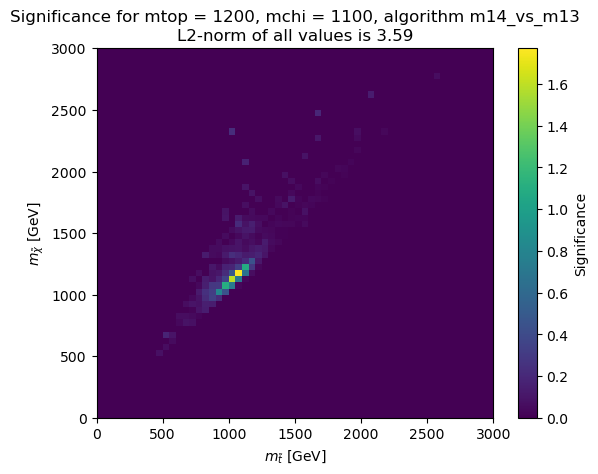

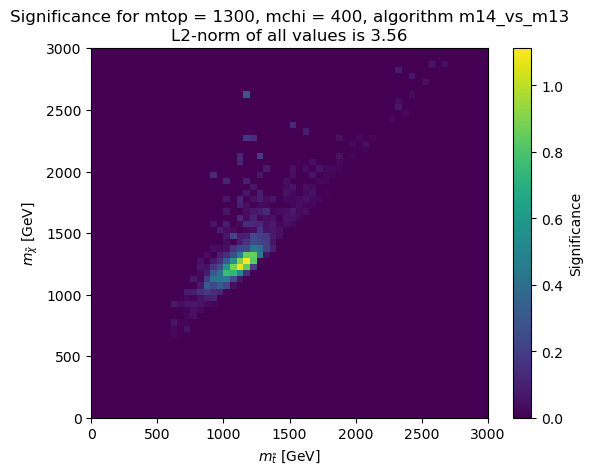

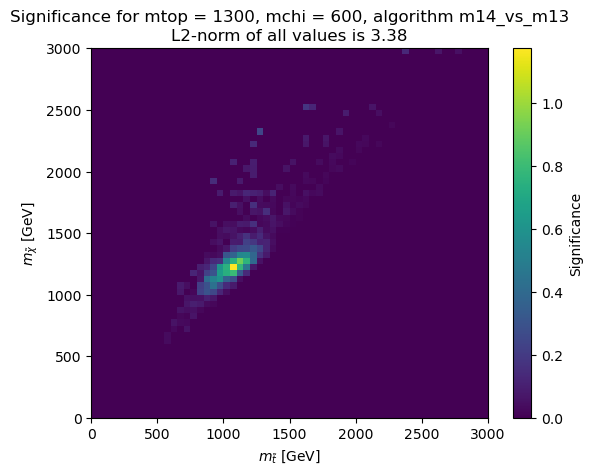

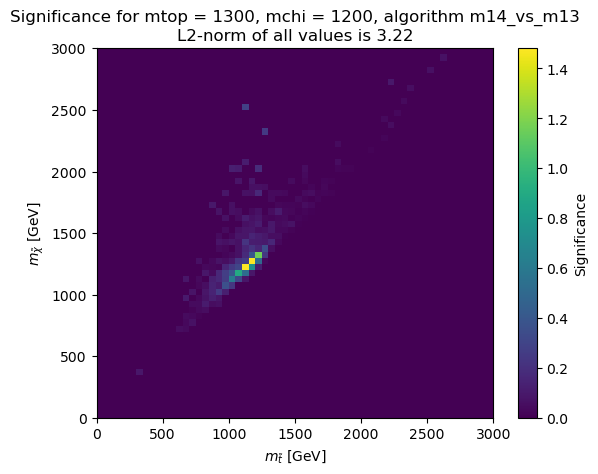

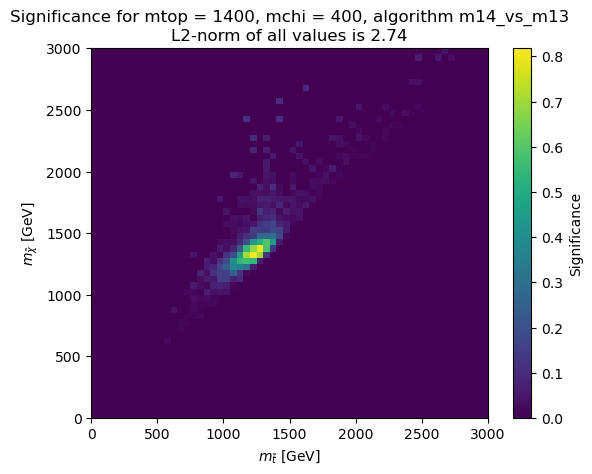

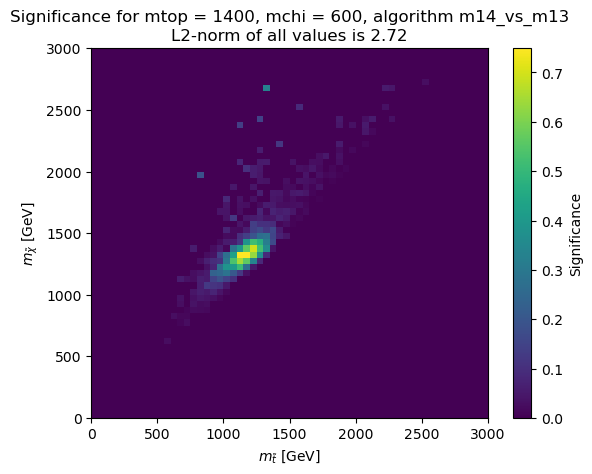

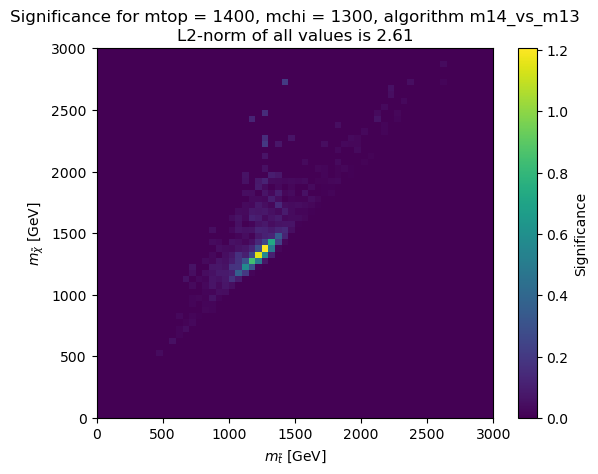

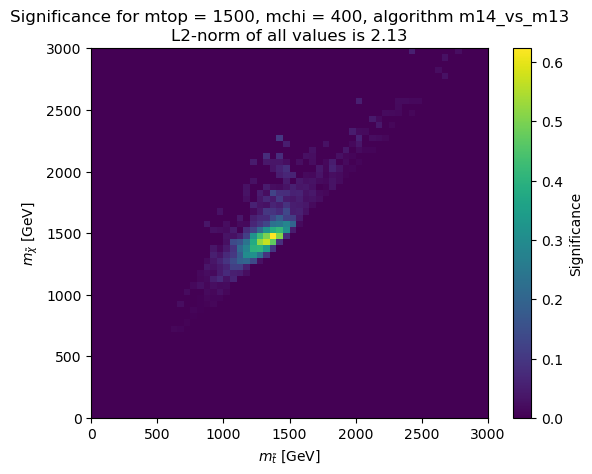

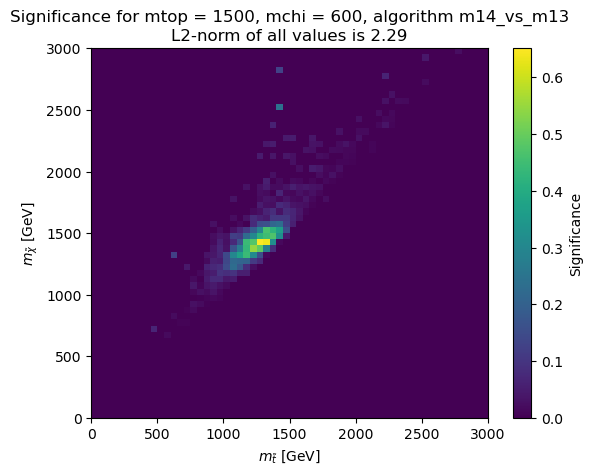

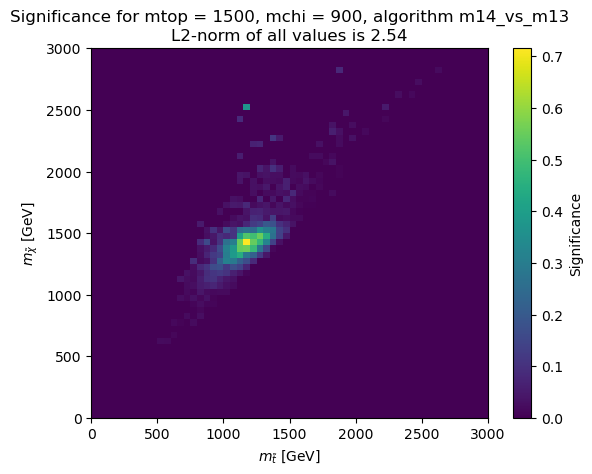

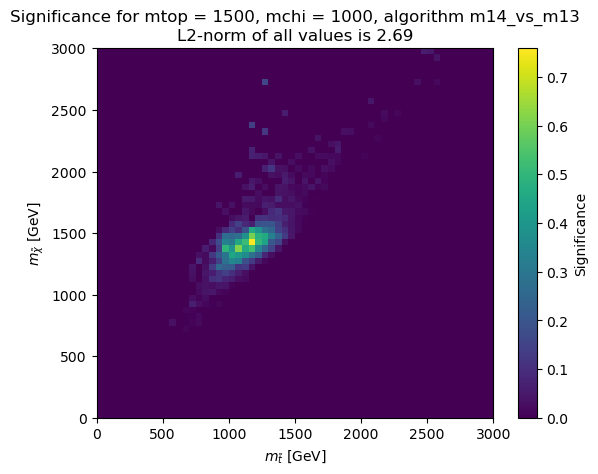

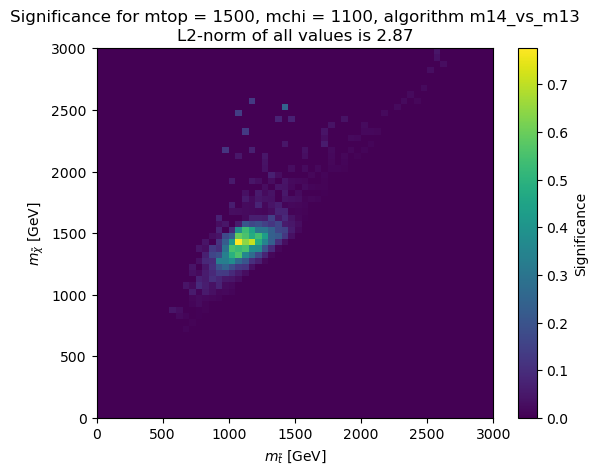

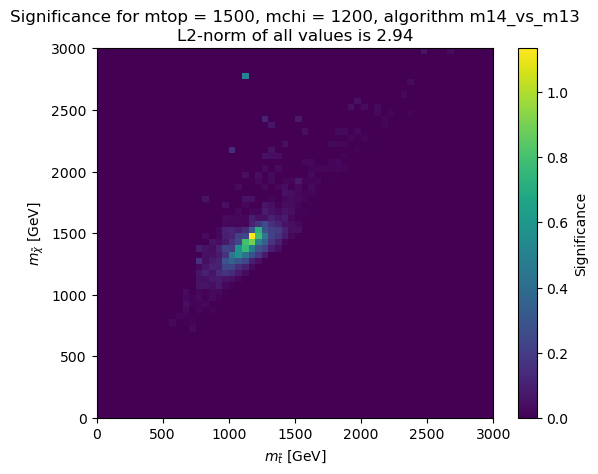

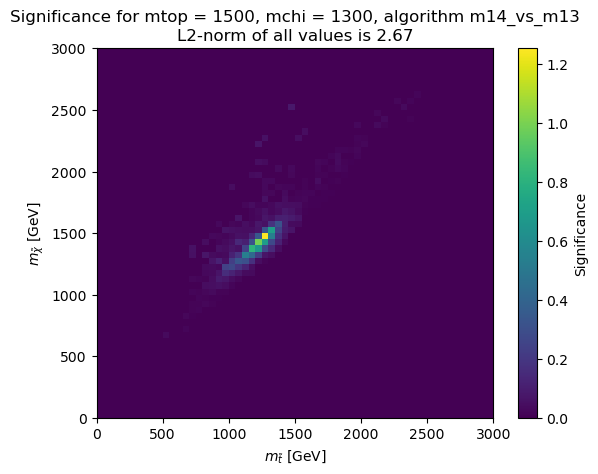

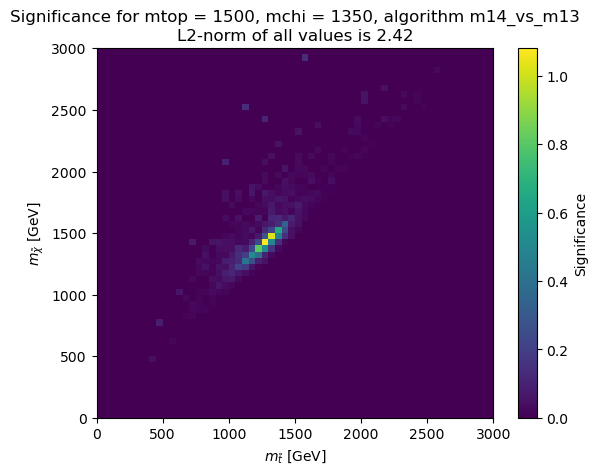

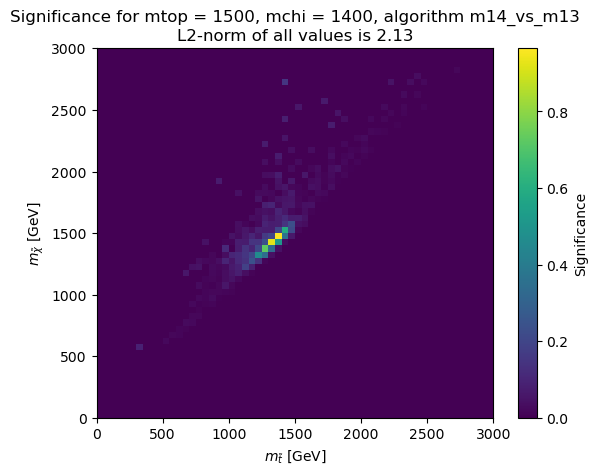

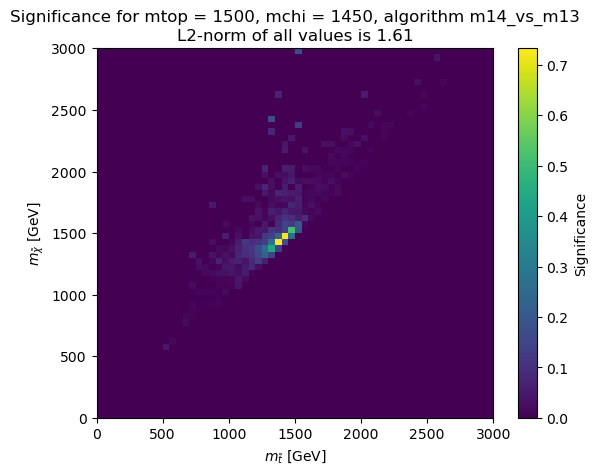

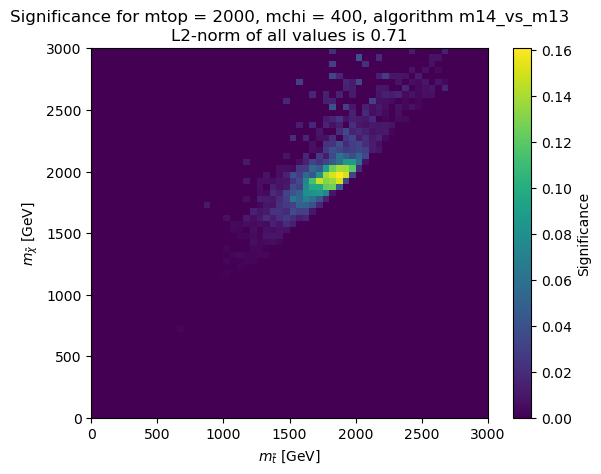

/srv/peakquality.py:40: RuntimeWarning: divide by zero encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


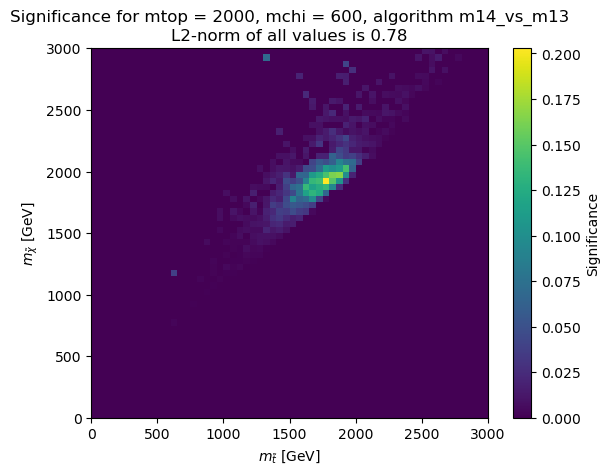

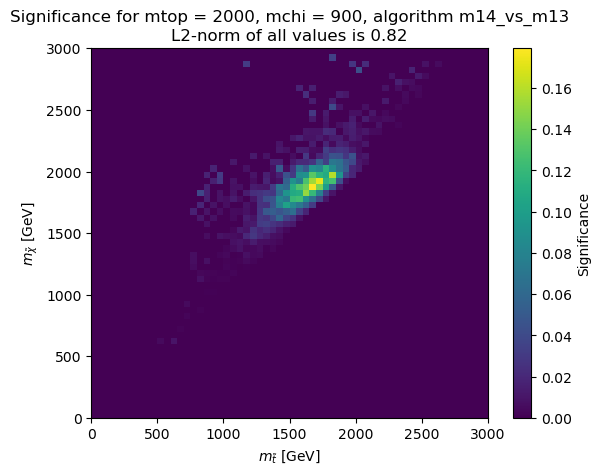

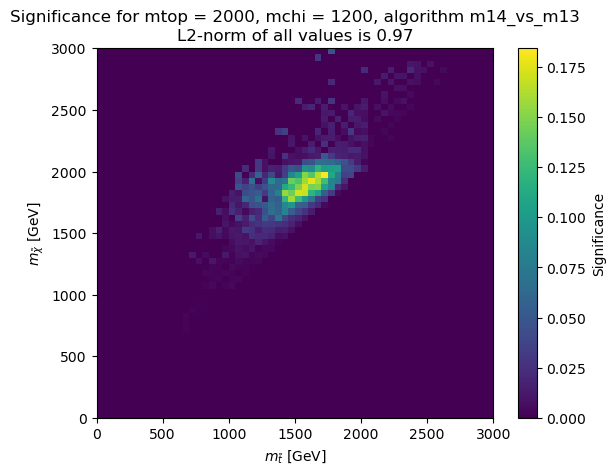

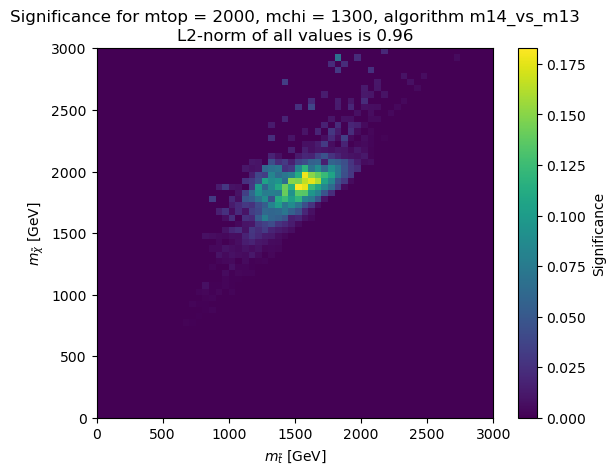

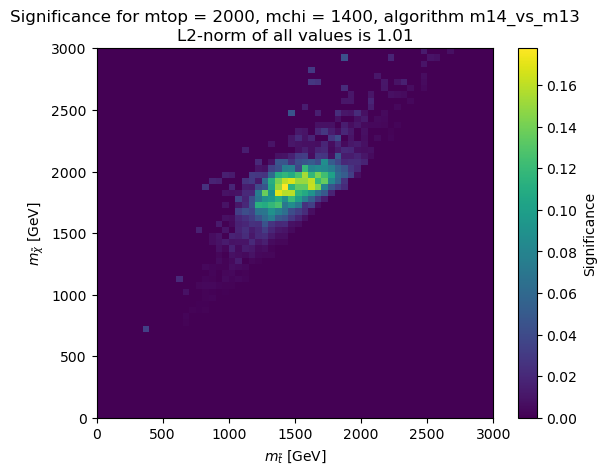

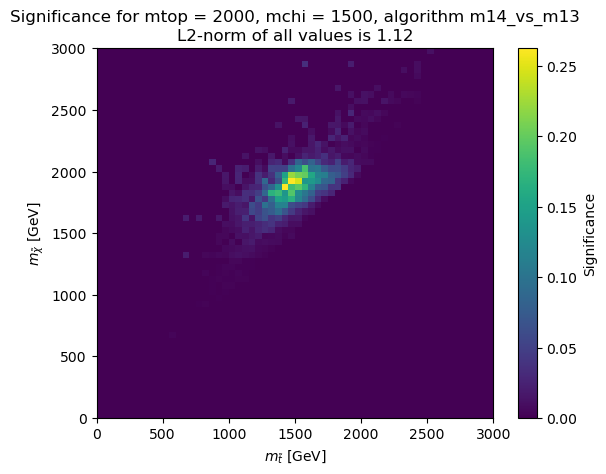

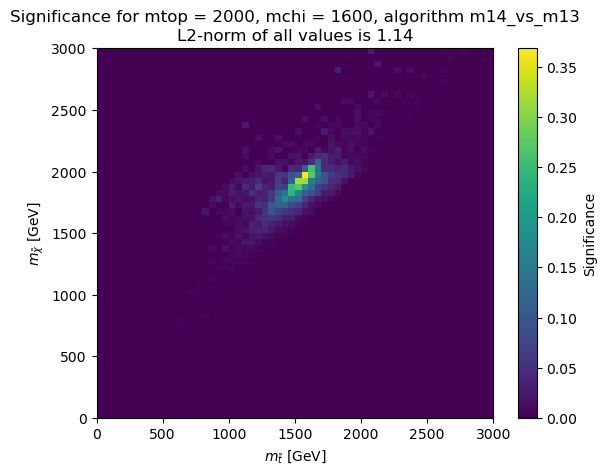

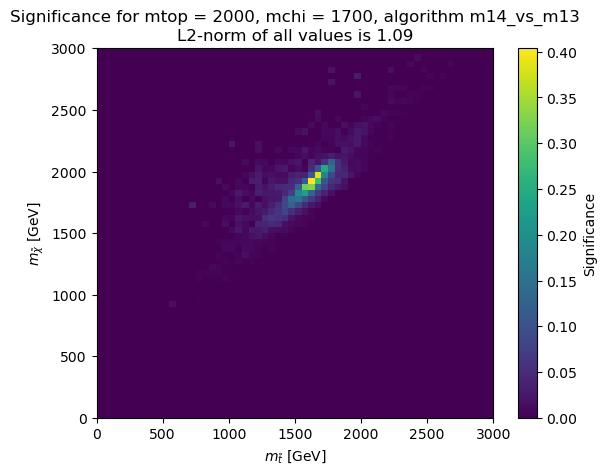

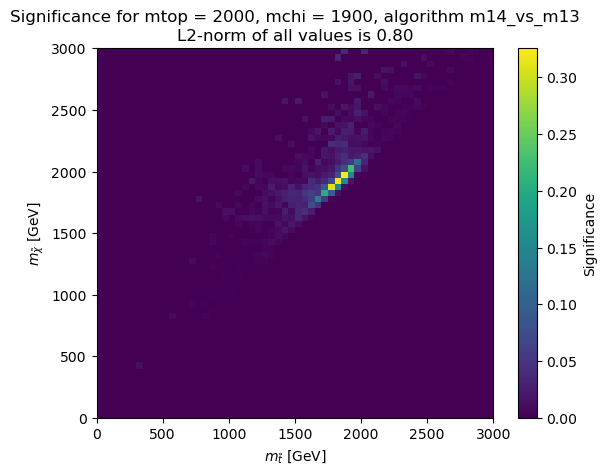

In [6]:
xvar = 'm14_vs_m13'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    significance, edges_x, edges_y, significance_points = pq.significance_2D(hists, bg_hists, "m14_vs_m13")
    
    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots()
    ax.set_title(f"Significance for mtop = {true_mtop}, mchi = {true_mchi}, algorithm {xvar}\nL2-norm of all values is {significance:.2f}")
    ax.set_xlabel("$m_{{\\tilde{{t}}}}$ [GeV]")
    ax.set_ylabel("$m_{{\\tilde{{\\chi}}}}$ [GeV]")
    cf = ax.pcolormesh(edges_x, edges_y, significance_points)
    cbar = plt.colorbar(cf)
    cbar.set_label("Significance")
    plt.show()

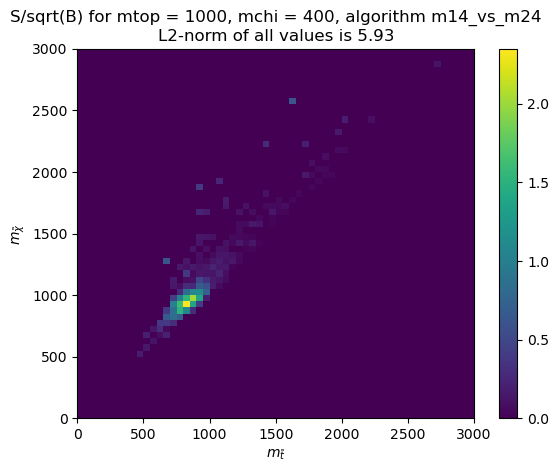

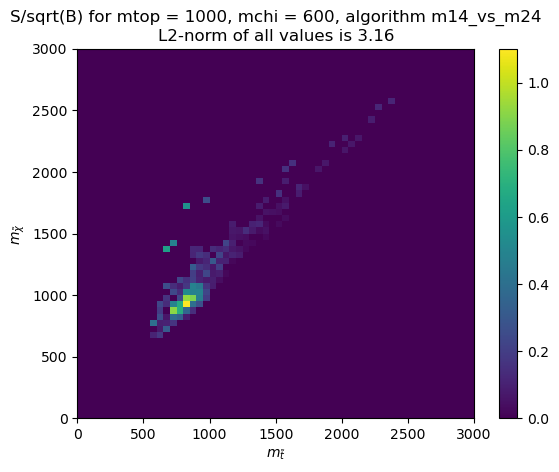

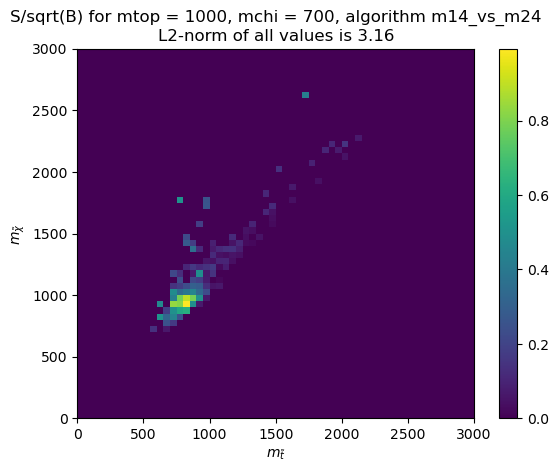

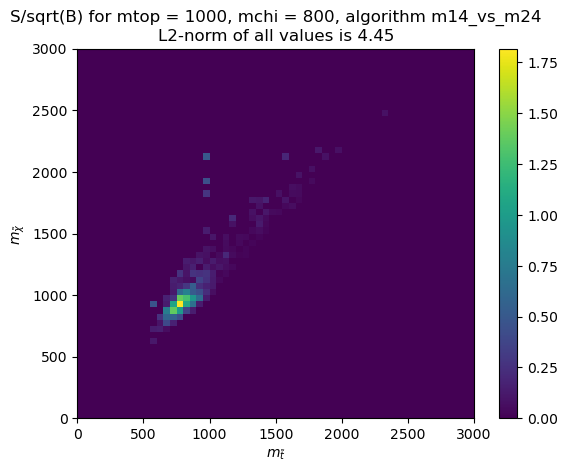

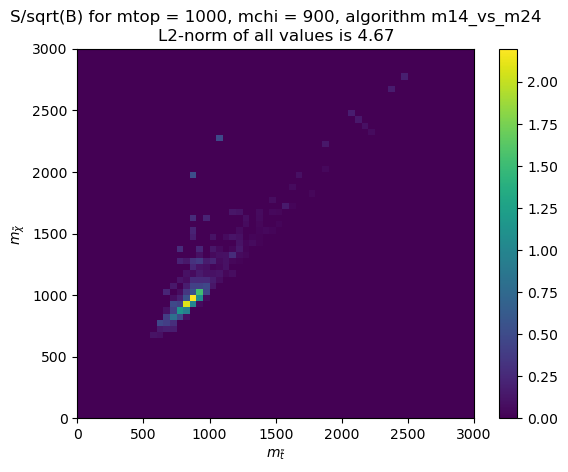

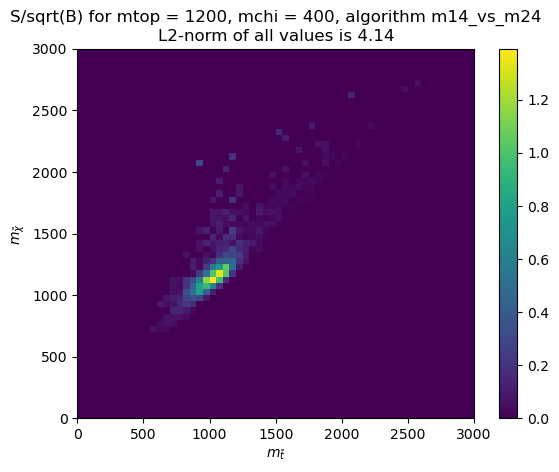

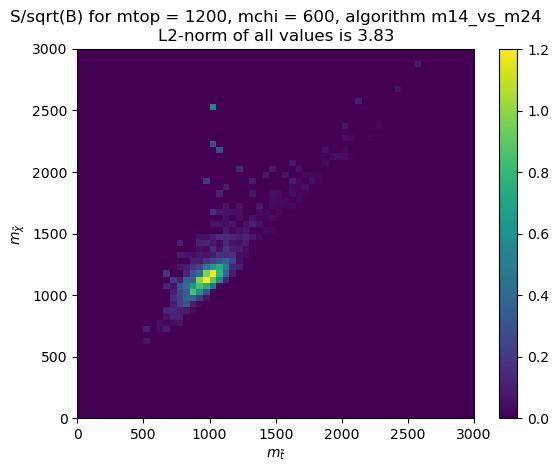

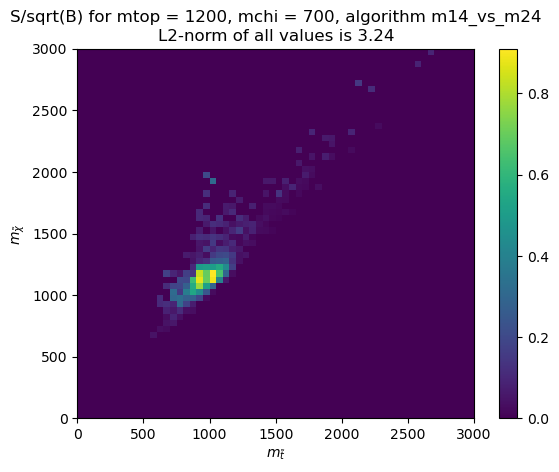

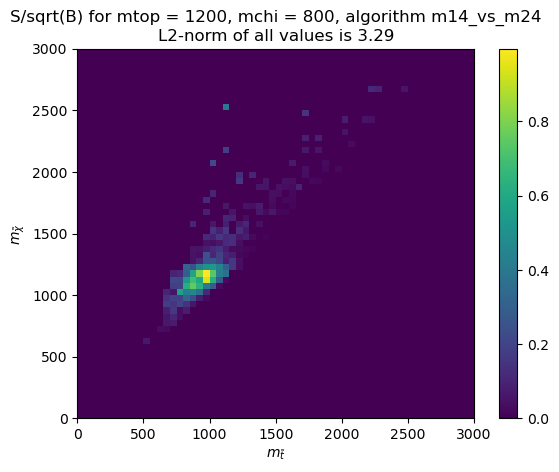

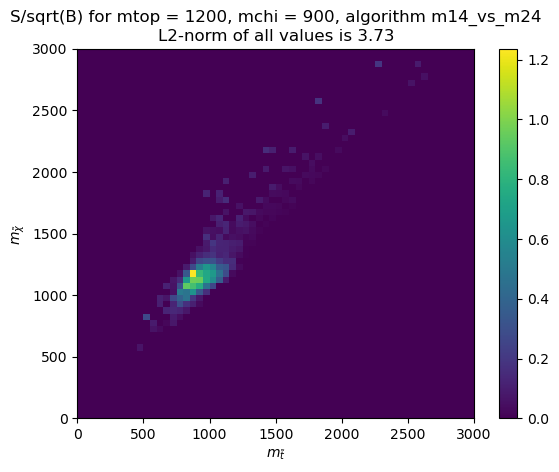

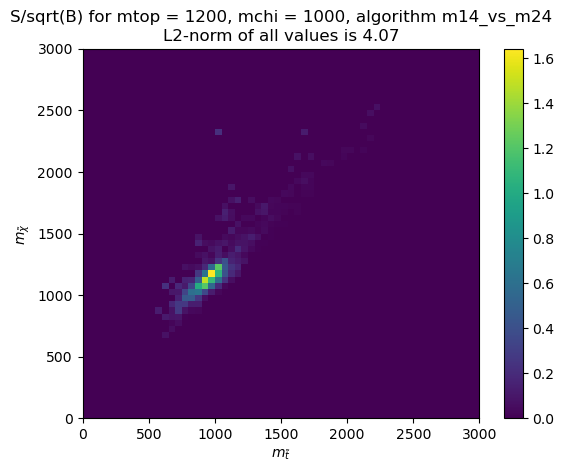

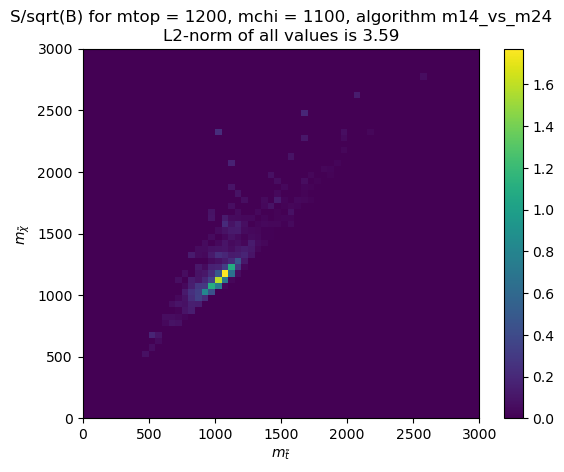

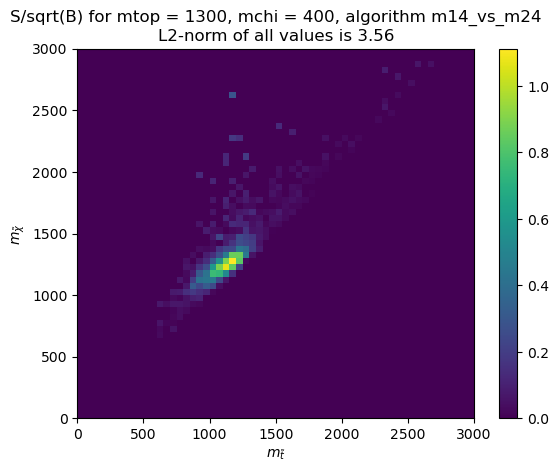

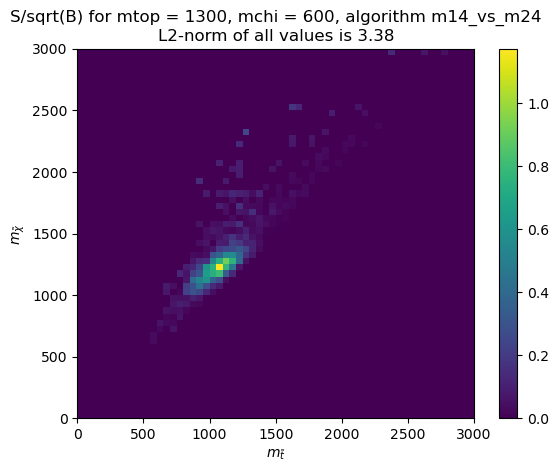

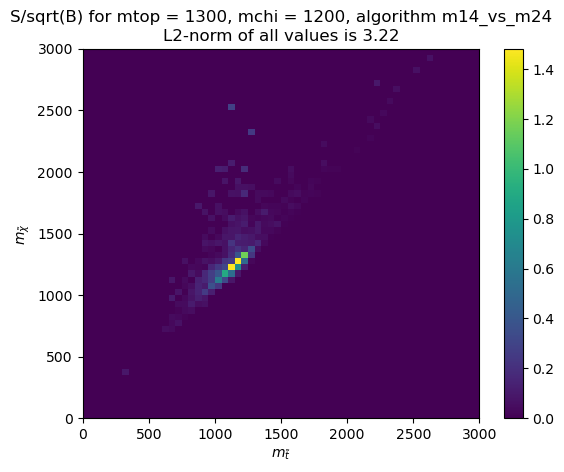

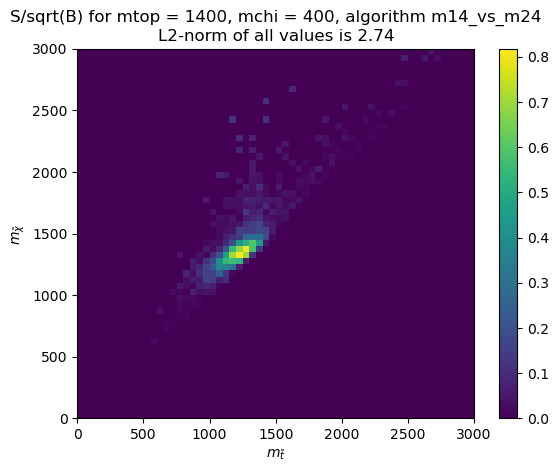

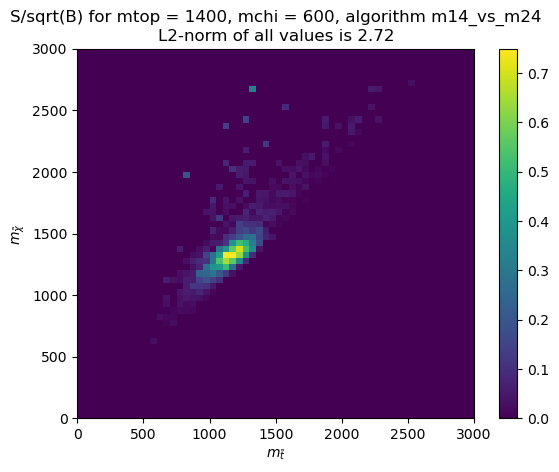

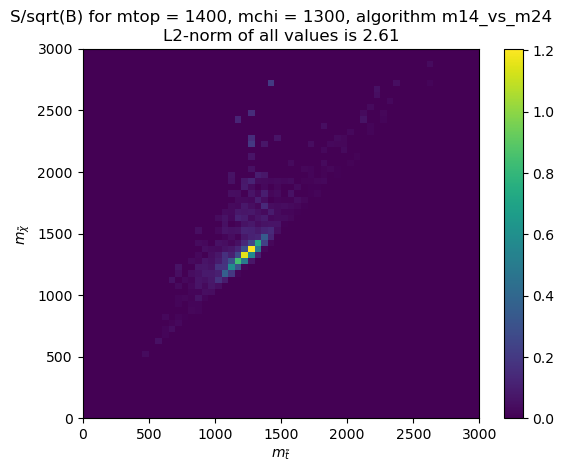

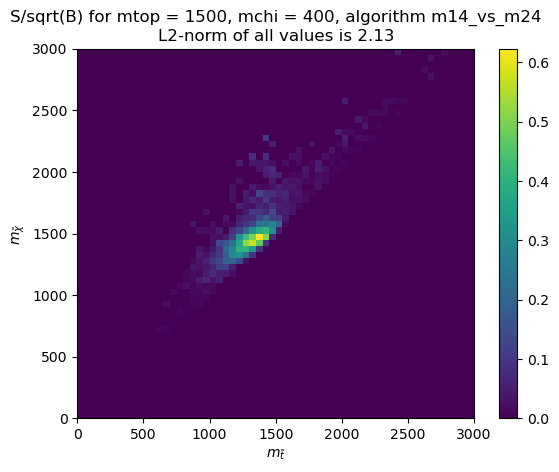

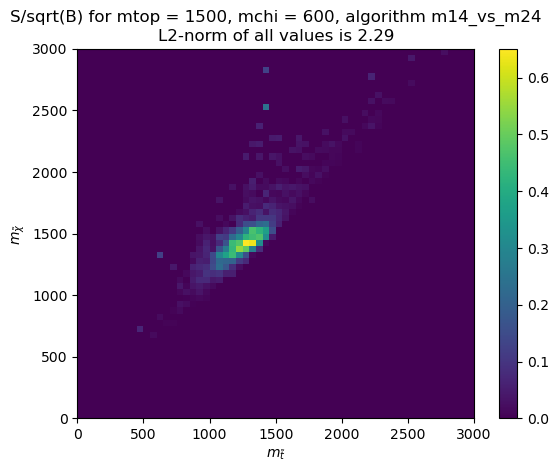

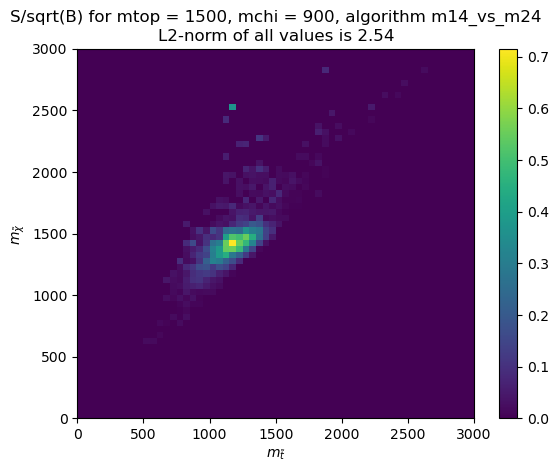

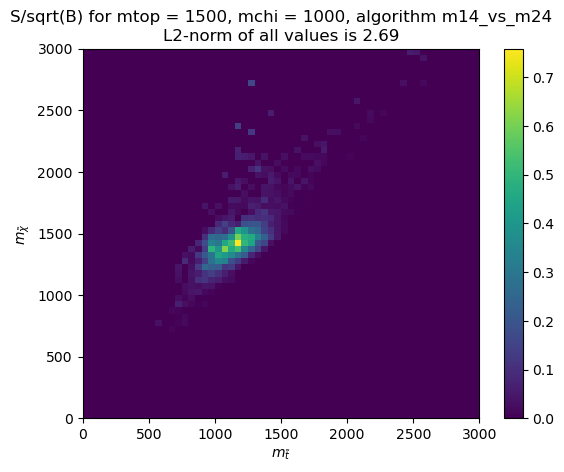

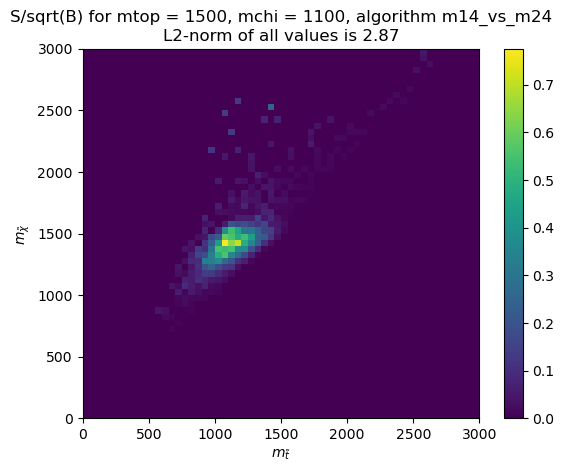

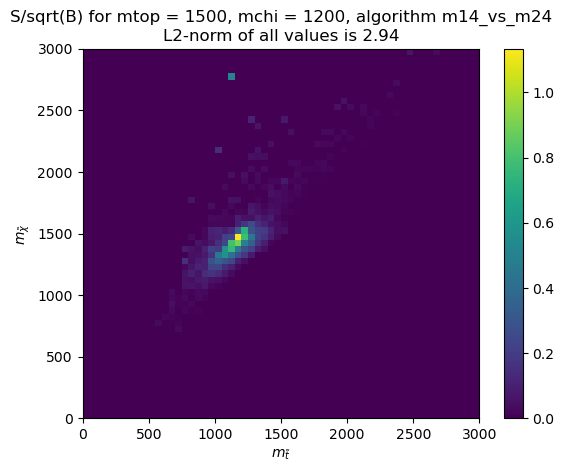

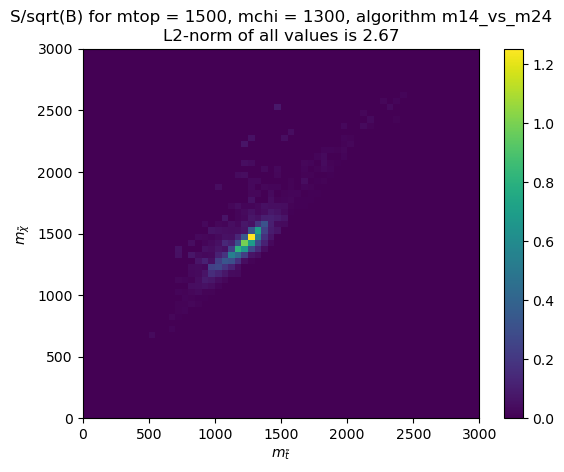

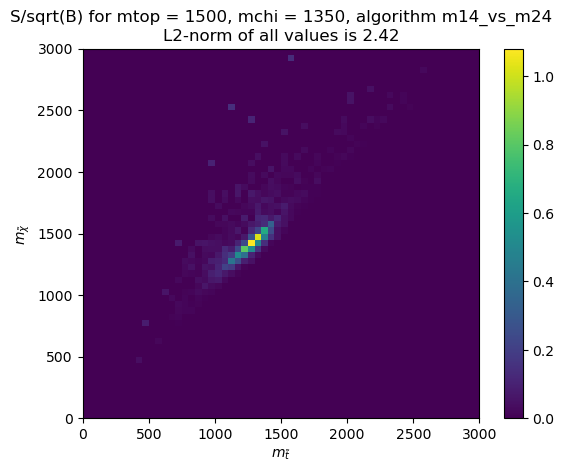

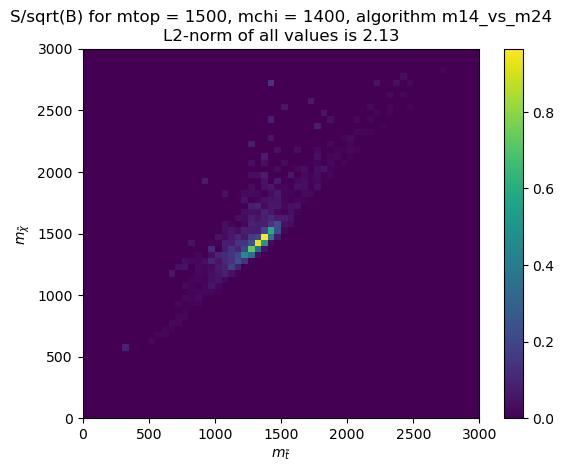

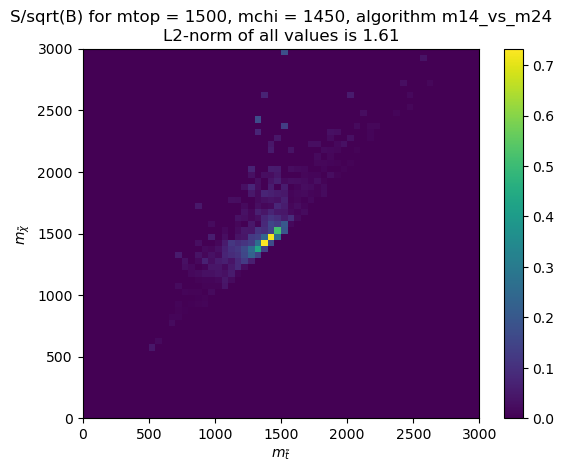

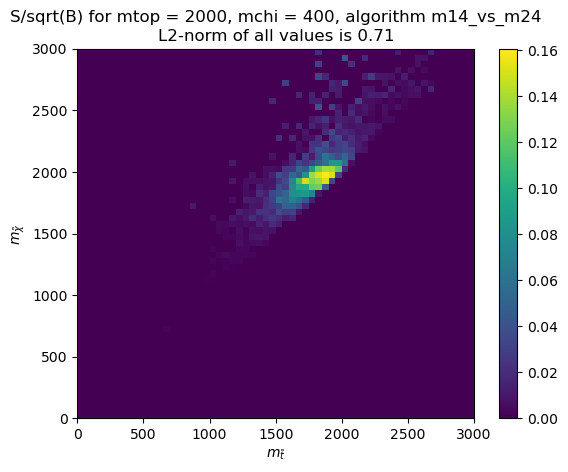

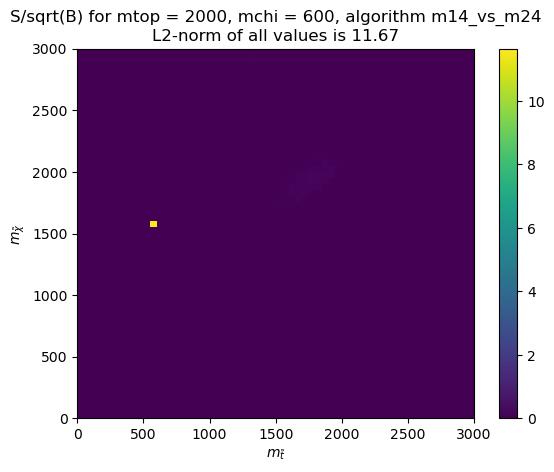

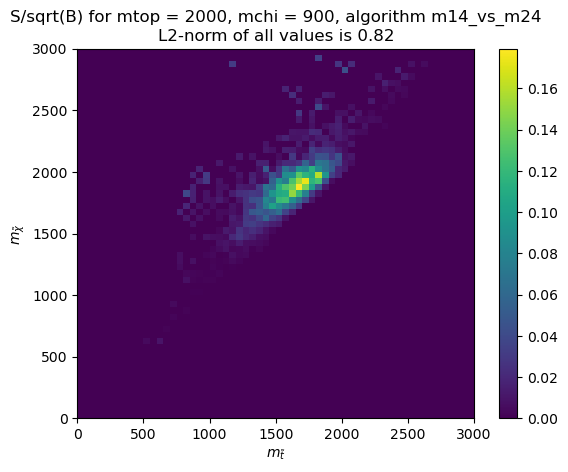

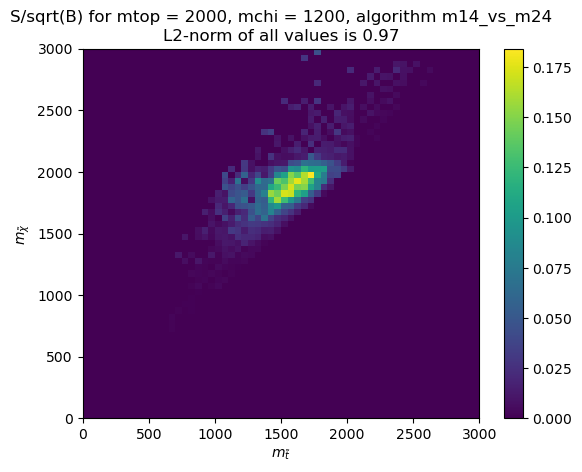

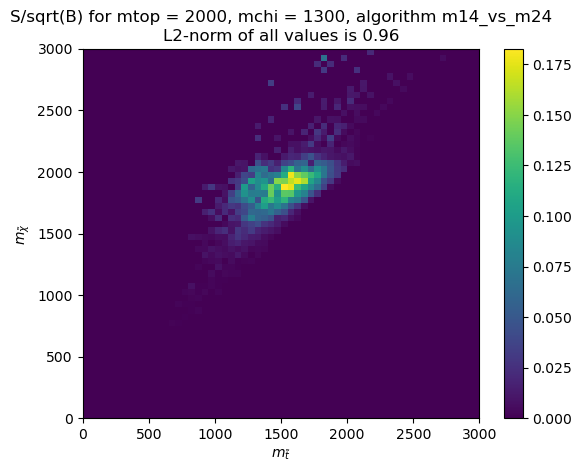

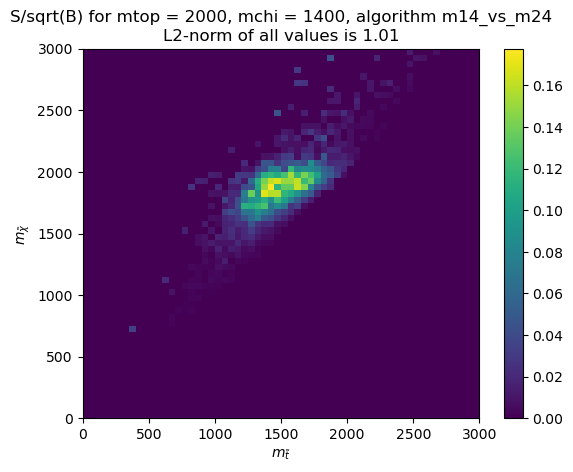

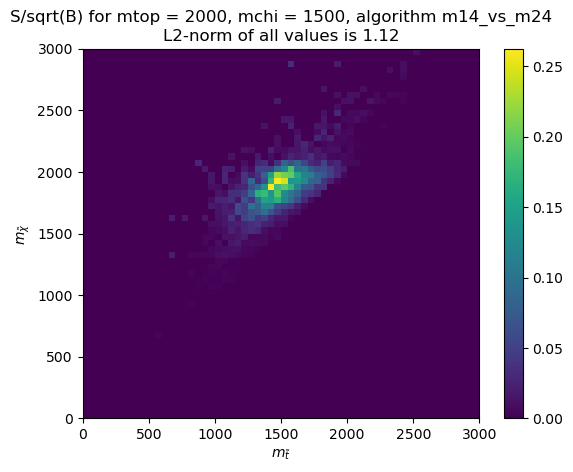

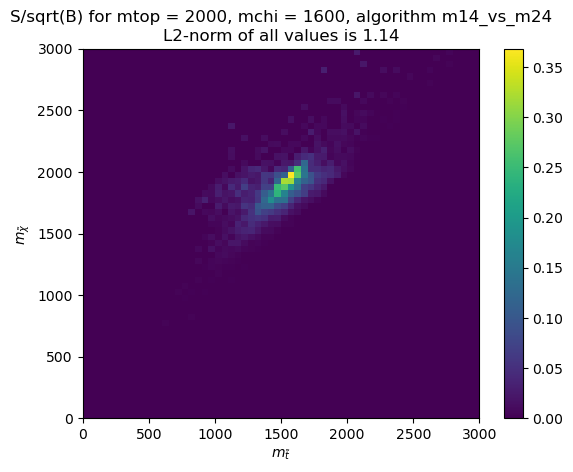

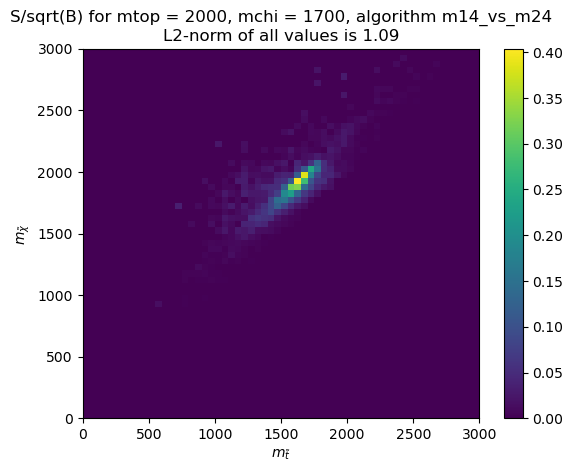

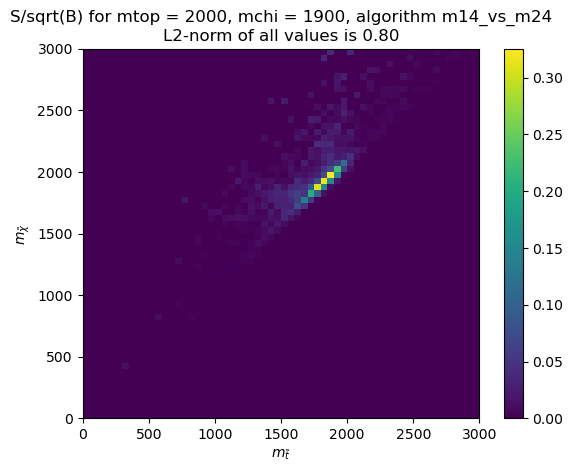

In [7]:
xvar = 'm14_vs_m24'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    significance, edges_x, edges_y, significance_points = pq.significance_2D(hists, bg_hists, "m14_vs_m24")
    
    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots()
    ax.set_title(f"Significance for mtop = {true_mtop}, mchi = {true_mchi}, algorithm {xvar}\nL2-norm of all values is {significance:.2f}")
    ax.set_xlabel("$m_{{\\tilde{{t}}}}$ [GeV]")
    ax.set_ylabel("$m_{{\\tilde{{\\chi}}}}$ [GeV]")
    cf = ax.pcolormesh(edges_x, edges_y, significance_points)
    cbar = plt.colorbar(cf)
    cbar.set_label("Significance")
    plt.show()

In [10]:
for row in significance_points:
    print(row)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

In [7]:
significance, bin_centers_x, bin_centers_y, significance_points = pq.significance_2D(hists, bg_hists, "m14_vs_m13")

/srv/peakquality.py:36: RuntimeWarning: invalid value encountered in divide
  s_over_root_b_points = np.nan_to_num(signal_data/sqrt_b)


(5.946936428553048,
 array([  25.,   75.,  125.,  175.,  225.,  275.,  325.,  375.,  425.,
         475.,  525.,  575.,  625.,  675.,  725.,  775.,  825.,  875.,
         925.,  975., 1025., 1075., 1125., 1175., 1225., 1275., 1325.,
        1375., 1425., 1475., 1525., 1575., 1625., 1675., 1725., 1775.,
        1825., 1875., 1925., 1975., 2025., 2075., 2125., 2175., 2225.,
        2275., 2325., 2375., 2425., 2475., 2525., 2575., 2625., 2675.,
        2725., 2775., 2825., 2875., 2925., 2975.]),
 array([  25.,   75.,  125.,  175.,  225.,  275.,  325.,  375.,  425.,
         475.,  525.,  575.,  625.,  675.,  725.,  775.,  825.,  875.,
         925.,  975., 1025., 1075., 1125., 1175., 1225., 1275., 1325.,
        1375., 1425., 1475., 1525., 1575., 1625., 1675., 1725., 1775.,
        1825., 1875., 1925., 1975., 2025., 2075., 2125., 2175., 2225.,
        2275., 2325., 2375., 2425., 2475., 2525., 2575., 2625., 2675.,
        2725., 2775., 2825., 2875., 2925., 2975.]),
 array([[0., 0., 0., ...

In [23]:
signal_hist_obj = PlotObject.fromHist(signal_hist)

<Axes: xlabel='$m_{4}$', ylabel='$m_{3}$'>

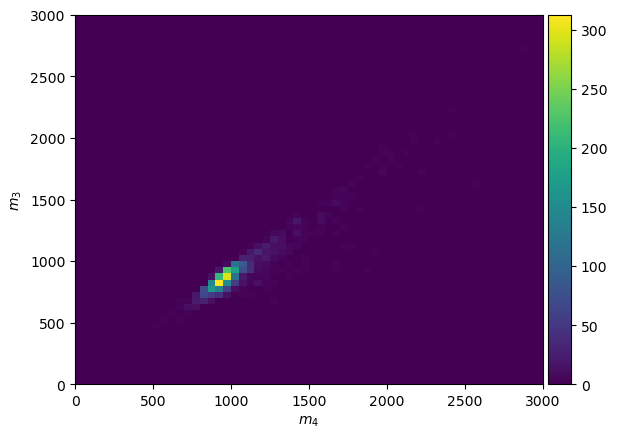

In [24]:
fig, ax = plt.subplots()
drawAs2DHist(ax, signal_hist_obj)

<Axes: xlabel='$m_{4}$', ylabel='$m_{3}$'>

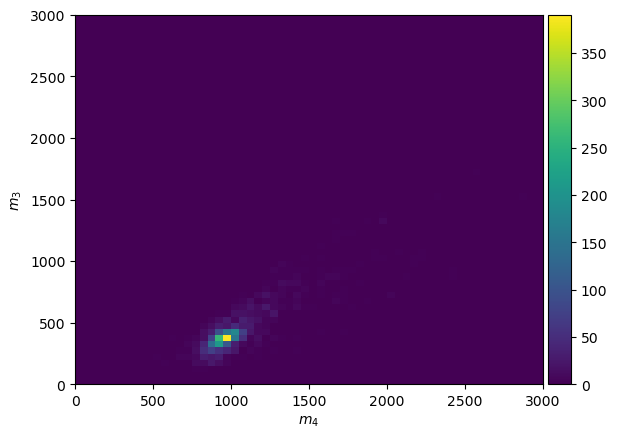

In [20]:
fig, ax = plt.subplots()
drawAs2DHist(ax, signal_hist_obj)

In [5]:
xvar = 'm14_vs_m13'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    significance, bin_centers, points = pq.significance_2D(hists, bg_hists, xvar, true_mchi)





[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  34.14683557,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 520.33477526,
         21.53935979,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 595.3728714 ,
        483.82995222,  26.93821498]]), array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200

ValueError: too many values to unpack (expected 2)